In [2]:
# !pip install pyreadr
import os
import pyreadr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
import importlib
import scm_fit
# importlib.reload(scm_fit)

### Initial data exploration

In [4]:
result = pyreadr.read_r('ihdp_hill_data/data/example.data')
result

OrderedDict([('ihdp',
                  iqsb.36  dose400  treat    bw  ...  momed4F  siteF  momraceF  workdur.imp.1
              0       120      1.0    1.0  1559  ...        4      1         w            1.0
              1        90      0.0    1.0  1420  ...        1      1         b            1.0
              2        76      0.0    0.0  1000  ...        1      1         b            1.0
              3        43      0.0    0.0  1430  ...        1      1         b            0.0
              4        73      0.0    0.0  1984  ...        3      1         b            0.0
              ..      ...      ...    ...   ...  ...      ...    ...       ...            ...
              980     105      0.0    1.0  2140  ...        4      8         w            1.0
              981      73      0.0    0.0  2350  ...        2      8         b            1.0
              982     127      0.0    0.0  1670  ...        4      8         w            1.0
              983      98      0.0    

In [5]:
ihdp_df = result['ihdp']

In [6]:
ihdp_df.columns

Index(['iqsb.36', 'dose400', 'treat', 'bw', 'momage', 'nnhealth', 'birth.o',
       'parity', 'moreprem', 'cigs', 'alcohol', 'ppvt.imp', 'bwg', 'female',
       'mlt.birt', 'b.marry', 'livwho', 'language', 'whenpren', 'drugs',
       'othstudy', 'mom.lths', 'mom.hs', 'mom.coll', 'mom.scoll', 'site1',
       'site2', 'site3', 'site4', 'site5', 'site6', 'site7', 'site8',
       'momblack', 'momhisp', 'momwhite', 'workdur.imp', 'bwg.1', 'female.1',
       'mlt.birtF', 'b.marryF', 'livwhoF', 'languageF', 'whenprenF', 'drugs.1',
       'othstudy.1', 'momed4F', 'siteF', 'momraceF', 'workdur.imp.1'],
      dtype='object')

In [7]:
result_corrected = pyreadr.read_r('ihdp_hill_data/data/example_corrected.data')
result_corrected

OrderedDict([('ihdp',
                  iqsb.36  ncdctt  dose400  treat  ...  momed4F  siteF  momraceF  workdur.imp.1
              0       120    4.32      1.0    1.0  ...        4      1         w            1.0
              1        90    3.91      0.0    1.0  ...        1      1         b            1.0
              2        76    0.00      0.0    0.0  ...        1      1         b            1.0
              3        43    0.00      0.0    0.0  ...        1      1         b            0.0
              4        73    0.00      0.0    0.0  ...        3      1         b            0.0
              ..      ...     ...      ...    ...  ...      ...    ...       ...            ...
              980     105    1.88      0.0    1.0  ...        4      8         w            1.0
              981      73    0.00      0.0    0.0  ...        2      8         b            1.0
              982     127    0.00      0.0    0.0  ...        4      8         w            1.0
              983 

In [9]:
result_corrected_treat1 = result_corrected['ihdp'][result_corrected['ihdp']['treat']==1]

4.68 0.0 3.26
3.48


(array([16.,  8., 16., 13., 16., 27., 44., 74., 78., 33.]),
 array([0.02 , 0.486, 0.952, 1.418, 1.884, 2.35 , 2.816, 3.282, 3.748,
        4.214, 4.68 ]),
 <BarContainer object of 10 artists>)

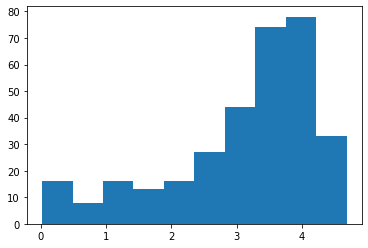

In [10]:
ndt = result_corrected['ihdp'][result_corrected['ihdp']['treat']==1]['ncdctt']
print(np.max(ndt), np.min(ndt), np.median(ndt))
ndt_wo_0 = [n for n in ndt if n>0]
print(np.median(ndt_wo_0))
plt.hist(ndt_wo_0)

In [11]:
sum(result_corrected['ihdp']['momwhite'])

363.0

In [12]:
len(result_corrected['ihdp'].columns), len(result_corrected['ihdp'])

(51, 985)

In [13]:
sum(result_corrected['ihdp']['ncdctt']>0), max(result_corrected['ihdp']['ncdctt']), min(result_corrected['ihdp']['ncdctt'])

(325, 4.68, 0.0)

<AxesSubplot:xlabel='iqsb.36', ylabel='Count'>

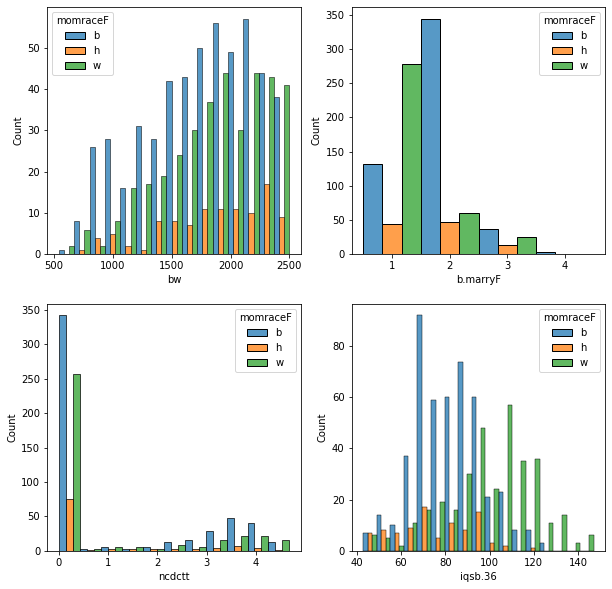

In [14]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))
sns.histplot(result_corrected['ihdp'], x = 'bw', hue = 'momraceF', multiple = 'dodge', ax = axs[0,0])
sns.histplot(result_corrected['ihdp'], x = 'b.marryF', hue = 'momraceF', multiple = 'dodge', ax = axs[0,1])
sns.histplot(result_corrected['ihdp'], x = 'ncdctt', hue = 'momraceF', multiple = 'dodge', ax = axs[1,0])
sns.histplot(result_corrected['ihdp'], x = 'iqsb.36', hue = 'momraceF', multiple = 'dodge', ax = axs[1,1])

<AxesSubplot:xlabel='iqsb.36', ylabel='Count'>

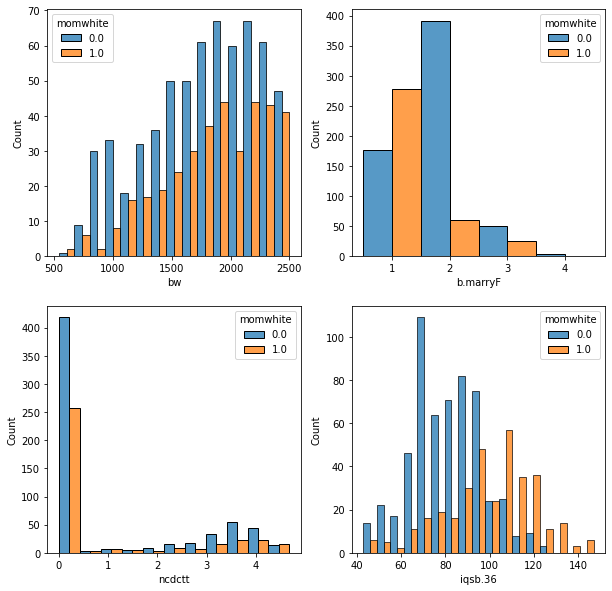

In [15]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))
sns.histplot(result_corrected['ihdp'], x = 'bw', hue = 'momwhite', multiple = 'dodge', ax = axs[0,0])
sns.histplot(result_corrected['ihdp'], x = 'b.marryF', hue = 'momwhite', multiple = 'dodge', ax = axs[0,1])
sns.histplot(result_corrected['ihdp'], x = 'ncdctt', hue = 'momwhite', multiple = 'dodge', ax = axs[1,0])
sns.histplot(result_corrected['ihdp'], x = 'iqsb.36', hue = 'momwhite', multiple = 'dodge', ax = axs[1,1])

<AxesSubplot:xlabel='iqsb.36', ylabel='Count'>

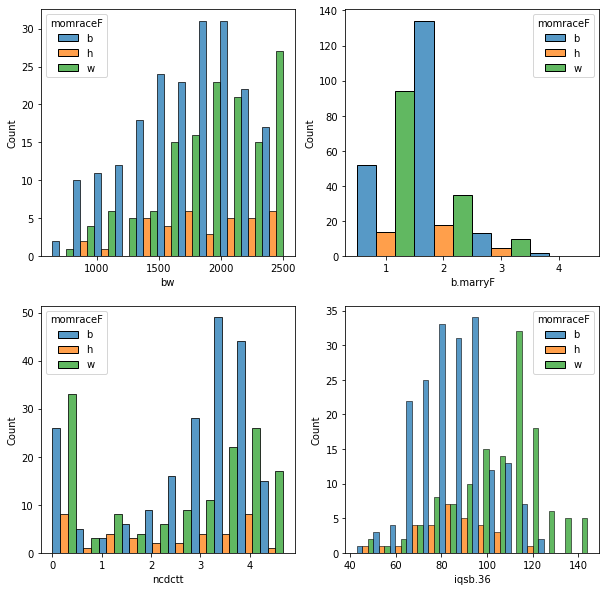

In [16]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))
sns.histplot(result_corrected_treat1, x = 'bw', hue = 'momraceF', multiple = 'dodge', ax = axs[0,0])
sns.histplot(result_corrected_treat1, x = 'b.marryF', hue = 'momraceF', multiple = 'dodge', ax = axs[0,1])
sns.histplot(result_corrected_treat1, x = 'ncdctt', hue = 'momraceF', multiple = 'dodge', ax = axs[1,0])
sns.histplot(result_corrected_treat1, x = 'iqsb.36', hue = 'momraceF', multiple = 'dodge', ax = axs[1,1])


<AxesSubplot:xlabel='iqsb.36', ylabel='Count'>

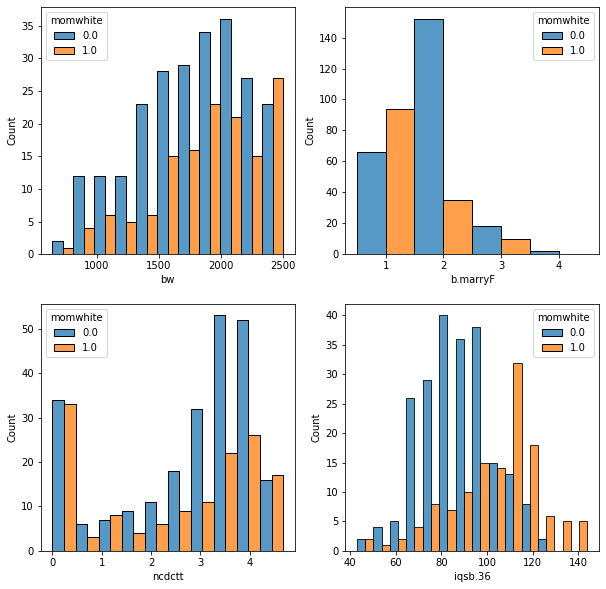

In [17]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))
sns.histplot(result_corrected_treat1, x = 'bw', hue = 'momwhite', multiple = 'dodge', ax = axs[0,0])
sns.histplot(result_corrected_treat1, x = 'b.marryF', hue = 'momwhite', multiple = 'dodge', ax = axs[0,1])
sns.histplot(result_corrected_treat1, x = 'ncdctt', hue = 'momwhite', multiple = 'dodge', ax = axs[1,0])
sns.histplot(result_corrected_treat1, x = 'iqsb.36', hue = 'momwhite', multiple = 'dodge', ax = axs[1,1])

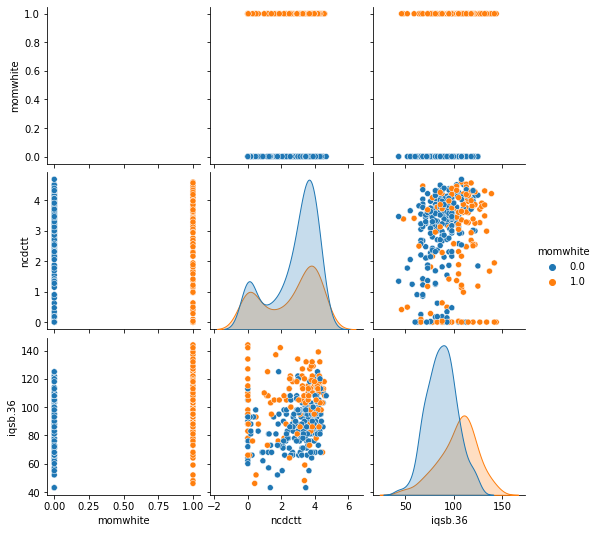

In [206]:
sns.pairplot(result_corrected_treat1, vars=['momwhite', 'ncdctt', 'iqsb.36'], hue='momwhite')

In [18]:
max(result_corrected['ihdp']['iqsb.36']), min(result_corrected['ihdp']['iqsb.36'])

(147, 43)

### Create base dataset

In [19]:
# removed "momblack","momhisp","momwhite", only include "momwhite" as sensitive var.
cat = ["bwg","female","mlt.birt","b.marry","livwho","language","whenpren","drugs","othstudy","mom.lths",\
    "mom.hs","mom.coll","mom.scoll","site1","site2","site3","site4","site5","site6","site7","site8", "workdur.imp"]
con = ["bw","momage","nnhealth","birth.o","parity","moreprem","cigs","alcohol","ppvt.imp"]
S = "momwhite"
A = "ncdctt"
A_binary = "dose400"
Y = "iqsb.36"

print(len(cat), len(con))

22 9


In [20]:
data_cont_action_df = pd.concat((result_corrected['ihdp'][con], result_corrected['ihdp'][cat], result_corrected['ihdp'][S], result_corrected['ihdp'][A], result_corrected['ihdp'][Y]), axis=1)
data_binary_action_df = pd.concat((result_corrected['ihdp'][con], result_corrected['ihdp'][cat], result_corrected['ihdp'][S], result_corrected['ihdp'][A_binary], result_corrected['ihdp'][Y]), axis=1)

data_cont_action_of_treated_df = pd.concat((result_corrected_treat1[con], result_corrected_treat1[cat], result_corrected_treat1[S], result_corrected_treat1[A], result_corrected_treat1[Y]), axis=1)
data_binary_action_of_treated_df = pd.concat((result_corrected_treat1[con], result_corrected_treat1[cat], result_corrected_treat1[S], result_corrected_treat1[A_binary], result_corrected_treat1[Y]), axis=1)

In [21]:
data_cont_action_of_treated_df.shape[1]

34

In [22]:
assert data_cont_action_of_treated_df.shape[1] == data_binary_action_of_treated_df.shape[1] == data_cont_action_df.shape[1] == data_binary_action_df.shape[1]
assert data_cont_action_of_treated_df.shape[0] == data_binary_action_of_treated_df.shape[0]
assert data_cont_action_df.shape[0] == data_binary_action_df.shape[0]

In [23]:
data_cont_action_of_treated_df.dropna().shape, data_binary_action_of_treated_df.dropna().shape,\
    data_cont_action_df.dropna().shape, data_binary_action_df.dropna().shape

((347, 34), (347, 34), (908, 34), (908, 34))

In [30]:
Path('../scripts/data/IHDP/').mkdir(parents=True, exist_ok=True)

data_cont_action_of_treated_df = data_cont_action_of_treated_df.dropna()
data_binary_action_of_treated_df = data_binary_action_of_treated_df.dropna()
data_cont_action_df = data_cont_action_df.dropna()
data_binary_action_df = data_binary_action_df.dropna()

# this is needed to prevent this column, which previously had NaNs, from remaining a numpy.object type
data_cont_action_of_treated_df['iqsb.36'] = data_cont_action_of_treated_df['iqsb.36'].astype('int')
data_binary_action_of_treated_df['iqsb.36'] = data_binary_action_of_treated_df['iqsb.36'].astype('int')
data_cont_action_df['iqsb.36'] = data_cont_action_df['iqsb.36'].astype('int')
data_binary_action_df['iqsb.36'] = data_binary_action_df['iqsb.36'].astype('int')

IHDP_cont_action_of_treated_df_np = data_cont_action_of_treated_df.to_numpy()
IHDP_binary_action_of_treated_df_np = data_binary_action_of_treated_df.to_numpy()

IHDP_data_cont_action_df_np = data_cont_action_df.to_numpy()
IHDP_data_binary_action_df_np = data_binary_action_df.to_numpy()

np.savez_compressed('../scripts/data/IHDP/cont_action_of_treated_all.npz', IHDP_cont_action_of_treated_df_np)
np.savez_compressed('../scripts/data/IHDP/binary_action_of_treated_all.npz', IHDP_binary_action_of_treated_df_np)

np.savez_compressed('../scripts/data/IHDP/cont_action_all.npz', IHDP_data_cont_action_df_np)
np.savez_compressed('../scripts/data/IHDP/binary_action_all.npz', IHDP_data_binary_action_df_np)

In [24]:
data_cont_action_of_treated_df_no_na = data_cont_action_of_treated_df.dropna()

In [25]:
S_name = "momwhite"
A_name = "ncdctt"
A_binary_name = "dose400"
Y_name = "iqsb.36"
X_cat = ["bwg","female","mlt.birt","b.marry","livwho","language","whenpren","drugs","othstudy","mom.lths",\
    "mom.hs","mom.coll","mom.scoll","site1","site2","site3","site4","site5","site6","site7","site8", "workdur.imp"]
X_con = ["bw","momage","nnhealth","ppvt.imp"]
X_count = ["birth.o","parity","moreprem","cigs","alcohol"]
data = np.array(data_cont_action_of_treated_df['momwhite']).reshape(-1, 1)
target = data_cont_action_of_treated_df[X_cat]

X = pd.concat((data_cont_action_of_treated_df_no_na[X_cat], data_cont_action_of_treated_df_no_na[X_con], data_cont_action_of_treated_df_no_na[X_count]), axis=1)
S = data_cont_action_of_treated_df_no_na[S_name]
A = data_cont_action_of_treated_df_no_na[A_name]
Y = data_cont_action_of_treated_df_no_na[Y_name]

### Bootstrap S and A, Fit A, Y

In [170]:
scm_boosting = scm_fit.SCM(X, S, A, Y, X_cat, X_con, X_count, S_type='cat', A_type='cont', Y_type='cont', rmse_noise_add_to_reg=False, bootstrap_exogenous=True)

dataset_expanded_20k_boosting = scm_boosting.sample_SCM(20000)

r2 score A: 0.9827954313297168
r2 score Y: 0.9817062070709806
variable_name from cont sample:  A
variable_name from cont sample:  Y


### Compare S

(array([12454.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7546.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

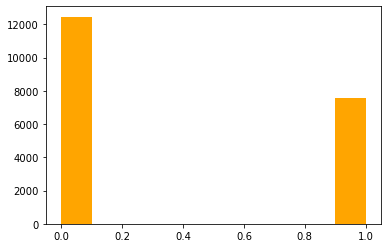

In [171]:
plt.hist(dataset_expanded_20k_boosting[0], color='orange')

(array([218.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 129.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

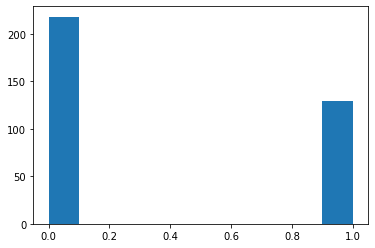

In [172]:
plt.hist(S)

### Compare X_cat

(array([ 9929.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 10071.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

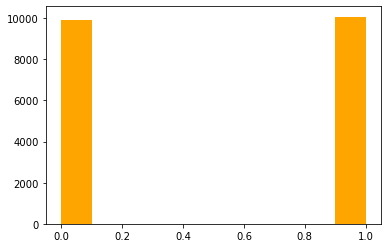

In [173]:
plt.hist(dataset_expanded_20k_boosting[1][:, 1], color='orange')

(array([171.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 176.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

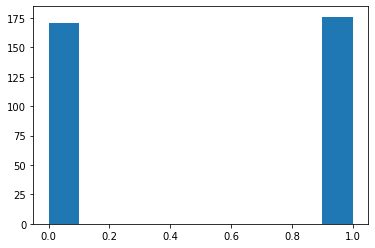

In [174]:
plt.hist(X[X_cat].iloc[:, 1])

(array([19035.,     0.,     0.,   377.,     0.,     0.,     0.,     0.,
            0.,   588.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

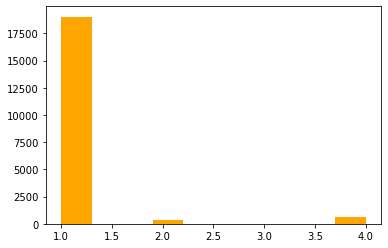

In [175]:
plt.hist(dataset_expanded_20k_boosting[1][:, 5], color='orange')

(array([331.,   0.,   0.,   6.,   0.,   0.,   0.,   0.,   0.,  10.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

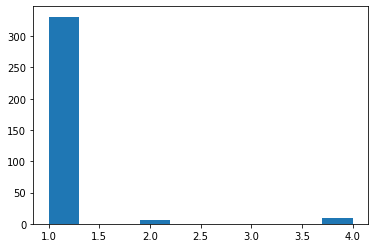

In [176]:
plt.hist(X[X_cat].iloc[:, 5])

(array([  551.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 19449.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

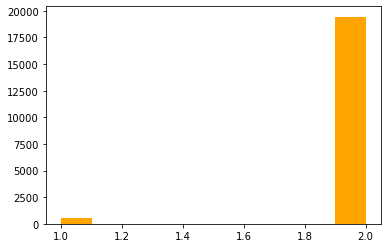

In [177]:
plt.hist(dataset_expanded_20k_boosting[1][:, 8], color='orange')

(array([ 10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 337.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

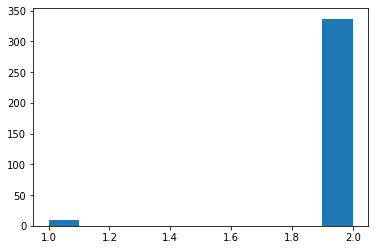

In [178]:
plt.hist(X[X_cat].iloc[:, 8])


### Compare X_cont

(array([ 217., 1106., 1000., 1228., 2337., 2425., 3159., 2808., 3127.,
        2593.]),
 array([ 640.,  826., 1012., 1198., 1384., 1570., 1756., 1942., 2128.,
        2314., 2500.]),
 <BarContainer object of 10 artists>)

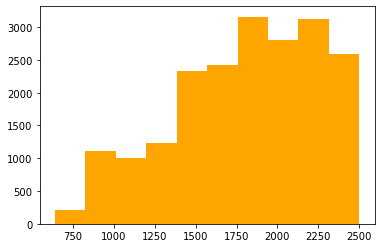

In [179]:
plt.hist(dataset_expanded_20k_boosting[1][:, 22], color='orange')

(array([ 4., 20., 17., 21., 41., 41., 55., 50., 54., 44.]),
 array([ 640.,  826., 1012., 1198., 1384., 1570., 1756., 1942., 2128.,
        2314., 2500.]),
 <BarContainer object of 10 artists>)

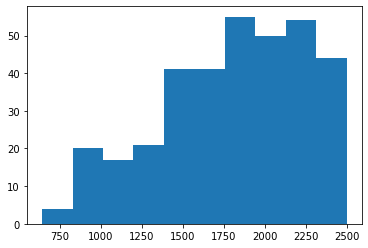

In [180]:
plt.hist(X[X_con].iloc[:, 0])

### Compare X_count

(array([10581.,  4826.,     0.,  2772.,     0.,  1242.,   336.,     0.,
          175.,    68.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

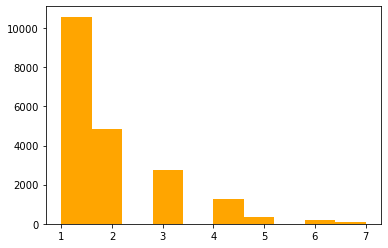

In [181]:
plt.hist(dataset_expanded_20k_boosting[1][:, 27], color='orange')

(array([169.,  98.,   0.,  41.,   0.,  24.,  10.,   0.,   2.,   3.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

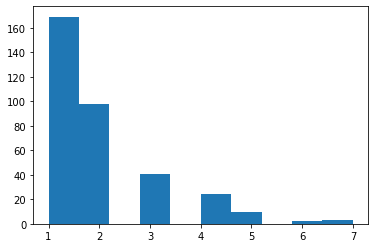

In [182]:
plt.hist(X[X_count].iloc[:, 0])

(array([19306.,   339.,   179.,     0.,    55.,     0.,     0.,     0.,
           57.,    64.]),
 array([ 0. ,  2.8,  5.6,  8.4, 11.2, 14. , 16.8, 19.6, 22.4, 25.2, 28. ]),
 <BarContainer object of 10 artists>)

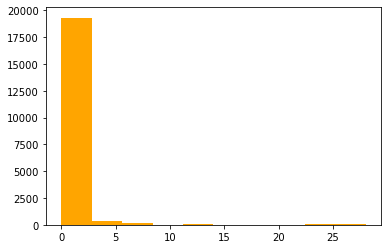

In [183]:
plt.hist(dataset_expanded_20k_boosting[1][:, 30], color='orange')

(array([335.,   6.,   3.,   0.,   1.,   0.,   0.,   0.,   1.,   1.]),
 array([ 0. ,  2.8,  5.6,  8.4, 11.2, 14. , 16.8, 19.6, 22.4, 25.2, 28. ]),
 <BarContainer object of 10 artists>)

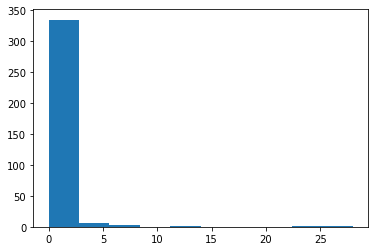

In [184]:
plt.hist(X[X_count].iloc[:, 4])

### Compare A

(array([2402.,  424.,  707.,  698., 1225., 1164., 1738., 5456., 4218.,
        1968.]),
 array([0.   , 0.468, 0.936, 1.404, 1.872, 2.34 , 2.808, 3.276, 3.744,
        4.212, 4.68 ]),
 <BarContainer object of 10 artists>)

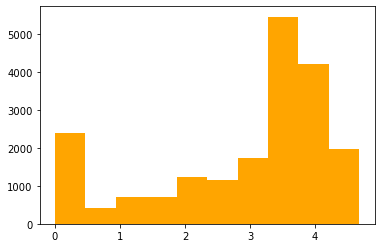

In [185]:
plt.hist(dataset_expanded_20k_boosting[2], color='orange')

In [186]:
len(dataset_expanded_20k_boosting[0]), len(A)

(20000, 347)

(array([41.,  8., 13., 13., 17., 26., 43., 75., 78., 33.]),
 array([0.   , 0.468, 0.936, 1.404, 1.872, 2.34 , 2.808, 3.276, 3.744,
        4.212, 4.68 ]),
 <BarContainer object of 10 artists>)

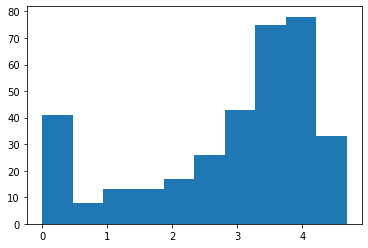

In [187]:
plt.hist(A)

### Compare Y

(array([ 399.,  397., 2332., 3322., 3277., 3955., 3216., 2256.,  518.,
         328.]),
 array([ 43. ,  53.1,  63.2,  73.3,  83.4,  93.5, 103.6, 113.7, 123.8,
        133.9, 144. ]),
 <BarContainer object of 10 artists>)

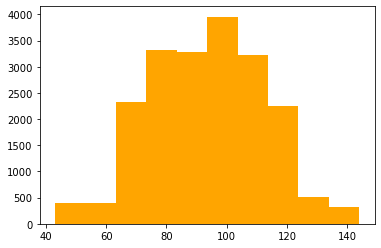

In [188]:
plt.hist(dataset_expanded_20k_boosting[3], color='orange')

(array([ 6.,  7., 44., 58., 61., 62., 56., 35., 11.,  7.]),
 array([43.0, 53.1, 63.2, 73.3, 83.4, 93.5, 103.6, 113.7, 123.8,
        133.89999999999998, 144.0], dtype=object),
 <BarContainer object of 10 artists>)

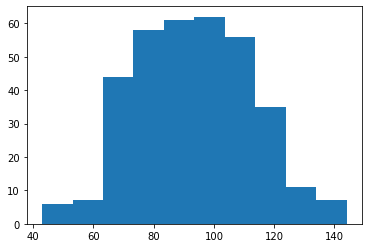

In [189]:
plt.hist(Y)

In [222]:
np.mean(Y)

93.52449567723343

### Save bootstrapped dataset

In [199]:
data_boosted_simulated20k_df_np = \
    np.hstack((dataset_expanded_20k_boosting[1], 
                dataset_expanded_20k_boosting[0],
                dataset_expanded_20k_boosting[2], 
                dataset_expanded_20k_boosting[3]))
data_boosted_simulated20k_df_np.shape, data_boosted_simulated20k_df_np.shape, dataset_expanded_20k_boosting[1].shape

((20000, 34), (20000, 34), (20000, 31))

In [191]:
Path('../scripts/data/IHDP/').mkdir(parents=True, exist_ok=True)

np.savez_compressed('../scripts/data/IHDP/cont_action_boosted_simulated20k_all.npz', data_boosted_simulated20k_df_np)

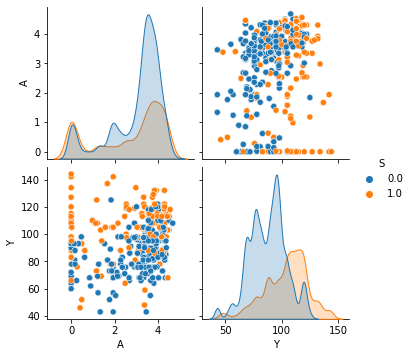

In [223]:
df_S_A_Y_df = pd.DataFrame(data_boosted_simulated20k_df_np[:, [31, 32, 33]], columns=['S', 'A', 'Y'])
sns.pairplot(df_S_A_Y_df, hue='S')

In [229]:
df_S_A_Y_df[df_S_A_Y_df['S']==0]['Y'].mean()

93.59626462703962

### Estimate effect of constant actions, compare stage1 model

In [210]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

gbr = GradientBoostingRegressor(random_state=42)

xsa = np.concatenate((dataset_expanded_20k_boosting[0], dataset_expanded_20k_boosting[1], dataset_expanded_20k_boosting[2]), axis=1)


In [ ]:
gbr.fit(xsa, dataset_expanded_20k_boosting[3])
gbr.score(xsa, dataset_expanded_20k_boosting[3])

In [242]:
gbr.predict(xsa).mean(), dataset_expanded_20k_boosting[2].mean()

(93.59626462703964, 2.8842183942460315)

In [219]:
# constant_action_0
xsa0 = xsa.copy()
xsa0[:, -1] = np.zeros(len(xsa))

# constant_action_1
xsa1 = xsa.copy()
xsa1[:, -1] = np.ones(len(xsa))

# constant_action_2
xsa2 = xsa.copy()
xsa2[:, -1] = np.full(len(xsa), fill_value=2)

# constant_action_3
xsa3 = xsa.copy()
xsa3[:, -1] = np.full(len(xsa), fill_value=3)

# constant_action_4
xsa4 = xsa.copy()
xsa4[:, -1] = np.full(len(xsa), fill_value=4)

# constant_action_5
xsa5 = xsa.copy()
xsa5[:, -1] = np.full(len(xsa), fill_value=5)

In [215]:
np.zeros(len(xsa))
# y_pred = gbr.predict()

array([0., 0., 0., ..., 0., 0., 0.])

In [220]:
preds_a0 = gbr.predict(xsa0)
preds_a1 = gbr.predict(xsa1)
preds_a2 = gbr.predict(xsa2)
preds_a3 = gbr.predict(xsa3)
preds_a4 = gbr.predict(xsa4)
preds_a5 = gbr.predict(xsa5) 

In [221]:
np.mean(preds_a0), np.mean(preds_a1), np.mean(preds_a2), np.mean(preds_a3), np.mean(preds_a4), np.mean(preds_a5)

(85.34993131271723,
 85.79863423712114,
 85.75471365116002,
 92.60043528433673,
 99.8992247759201,
 100.65773879002053)

In [237]:
np.mean(preds_a0[dataset_expanded_20k_boosting[0].squeeze()==0]), np.mean(preds_a1[dataset_expanded_20k_boosting[0].squeeze()==0]), \
np.mean(preds_a2[dataset_expanded_20k_boosting[0].squeeze()==0]), np.mean(preds_a3[dataset_expanded_20k_boosting[0].squeeze()==0]), \
np.mean(preds_a4[dataset_expanded_20k_boosting[0].squeeze()==0]), np.mean(preds_a5[dataset_expanded_20k_boosting[0].squeeze()==0])

(77.89411273200851,
 77.91859019398984,
 77.84805769686258,
 86.79124585107661,
 94.88492057090963,
 95.762348855527)

In [239]:
np.mean(preds_a0[dataset_expanded_20k_boosting[0].squeeze()==1]), np.mean(preds_a1[dataset_expanded_20k_boosting[0].squeeze()==1]), \
np.mean(preds_a2[dataset_expanded_20k_boosting[0].squeeze()==1]), np.mean(preds_a3[dataset_expanded_20k_boosting[0].squeeze()==1]), \
np.mean(preds_a4[dataset_expanded_20k_boosting[0].squeeze()==1]), np.mean(preds_a5[dataset_expanded_20k_boosting[0].squeeze()==1])

(97.65509492312624,
 98.80394413814918,
 98.80394413814918,
 102.18798434368225,
 108.174886658931,
 108.73714327506991)